In [33]:
%pylab inline
import tensorflow as tf
#from src.setup.config import db
from itertools import groupby
import pandas as pd
from collections import OrderedDict
from datetime import date
import pyodbc
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [161]:
coords=pd.read_csv('C:/Users/Vivi/Desktop/hack4health_RKI-data-scripts/survstat/csv/coordinates_file.csv',encoding='utf-8')
coords.columns = ['county','X','Y']

In [162]:
coords = coords.dropna().reset_index()
Co = coords[['county','X','Y']]
Co

,county,X,Y
0,LK Germersheim,8.238554,49.136851
1,LK Fulda,9.754013,50.591582
2,LK Sankt Wendel,7.097282,49.520315
3,LK Rendsburg-Eckernförde,9.808402,54.298504
4,LK Osnabrück,8.068736,52.334706
5,SK Leverkusen,7.016196,51.056357
6,LK Salzlandkreis,11.771923,52.068518
7,SK Bremen,8.985247,53.127569
8,LK Olpe,7.988382,51.093069
9,LK Dachau,11.344295,48.342147


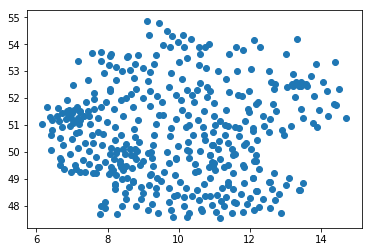

In [163]:
plt.scatter(Co['X'],Co['Y'])
plt.show()

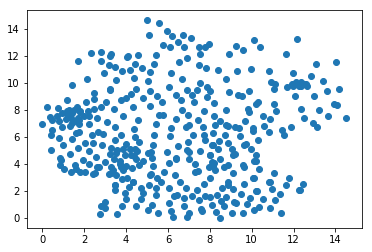

In [164]:
ConewX = (Co['X']-np.min(Co['X']))*1.7
ConewY = (Co['Y']-np.min(Co['Y']))*2
plt.scatter(ConewX,ConewY)
plt.show()

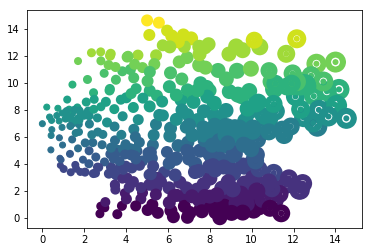

,county,X,Y,BinX,BinY
0,LK Germersheim,8.238554,49.136851,4,4
1,LK Fulda,9.754013,50.591582,7,7
2,LK Sankt Wendel,7.097282,49.520315,2,4
3,LK Rendsburg-Eckernförde,9.808402,54.298504,7,14
4,LK Osnabrück,8.068736,52.334706,4,10
5,SK Leverkusen,7.016196,51.056357,2,7
6,LK Salzlandkreis,11.771923,52.068518,10,10
7,SK Bremen,8.985247,53.127569,5,12
8,LK Olpe,7.988382,51.093069,4,8
9,LK Dachau,11.344295,48.342147,9,2


In [165]:
bins = np.linspace(0,15,16)

BinsortX = np.digitize(ConewX,bins)
BinsortY = np.digitize(ConewY,bins)
plt.scatter(ConewX,ConewY,c=BinsortY,linewidths=BinsortX)
plt.show()
sortedBins = pd.DataFrame({'BinX':BinsortX,'BinY':BinsortY})
CoNew = Co.join(sortedBins)
CoNew

In [94]:
CoNew.to_csv('CoordBins.csv')

In [219]:
shape(Locations)

(19201, 6)

In [217]:
Labels=pd.read_csv('MasernOutput.csv',encoding='latin-1').set_index('Unnamed: 0')
Data=pd.read_csv('MasernInput.csv',encoding='latin-1').set_index('Unnamed: 0')
CoNew = pd.read_csv('CoordBins.csv',encoding='latin-1')
dfboth = Data.join(Labels,lsuffix='x',how='outer')#.dropna()
#Data = dfboth[['week','countx','incidencex']].rename(index=str, columns={"countx": "count", "incidencex": "incidence"})
#Labels = dfboth[['count','incidence']]

Locations = pd.DataFrame(columns=['X','Y','BinX','BinY'])
for i in range(shape(Labels)[0]):
    loc = CoNew[CoNew['county']==Data['county'][i]]
    if loc['X'].values>0:
        Locations = Locations.append(loc)
    else:
        print("hey")
        print(loc)
    Locations = Locations.append({'X':0,'Y':0,'BinX':0,'BinY':0}, ignore_index=True)
#dfboth.join(Locations,lsuffix='x',how='outer')#.dropna()

C:\Users\Vivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, BinY]
Index: []
hey
Empty DataFrame
Columns: [Unnamed: 0, county, X, Y, BinX, Bi

In [191]:
Locations=Locations#.reset_index()
Data2 = Data.join(Locations,lsuffix='x',how='outer')#.dropna()

In [154]:
CoNew[CoNew['county']==Data['county'][0]]

,county,X,Y,BinX,BinY
159,LK Cham,12.672938,49.224303,12,4


In [192]:
Data2

,week,year,countyx,count,incidence,level_0,index,BinX,BinY,Unnamed: 0,X,Y,county
0,1,2001,LK Cham,1.0,29.529012,0.0,159.0,12,4,159.0,12.672938,49.224303,LK Cham
1,1,2001,LK Main-Taunus-Kreis,1.0,16.459852,1.0,187.0,4,6,187.0,8.431752,50.113092,LK Main-Taunus-Kreis
2,1,2001,LK Marburg-Biedenkopf,1.0,15.782552,2.0,57.0,5,7,57.0,8.742194,50.840613,LK Marburg-Biedenkopf
3,1,2001,LK Saale-Orla-Kreis,2.0,94.775932,3.0,378.0,10,7,378.0,11.712125,50.585463,LK Saale-Orla-Kreis
4,1,2001,LK Segeberg,1.0,14.976038,4.0,135.0,7,13,135.0,10.160411,53.904668,LK Segeberg
5,1,2001,SK Darmstadt,1.0,16.475219,5.0,322.0,5,5,322.0,8.666565,49.889684,SK Darmstadt
6,1,2001,SK Düsseldorf,2.0,8.411475,6.0,323.0,2,8,323.0,6.825464,51.235562,SK Düsseldorf
7,2,2001,LK Cham,3.0,110.391703,7.0,159.0,12,4,159.0,12.672938,49.224303,LK Cham
8,2,2001,LK Darmstadt-Dieburg,1.0,12.926391,8.0,366.0,5,5,366.0,8.757112,49.858567,LK Darmstadt-Dieburg
9,2,2001,LK Karlsruhe,1.0,6.690355,9.0,168.0,5,3,168.0,8.548759,49.036669,LK Karlsruhe


In [134]:
import sklearn
x = Data['BinX']
#norm1 = x / np.linalg.norm(x)
normBin =sklearn.preprocessing.normalize([x])
Data['BinX']=normBin[0]

In [169]:
thisweek = Data[Data['year']==2002][Data[Data['year']==2002]['week']==1]
mapTest = np.zeros((16,16))
for i in range(shape(thisweek)[0]):
    inc = thisweek['incidence'][i]
    x = thisweek['BinX'][i]
    y = thisweek['BinY'][i]
    mapTest[x][y]=inc
plt.imshow(mapTest, cmap='hot', interpolation='nearest')
plt.show()

KeyError: 0

In [170]:
thisweek

,week,year,countyx,count,incidence,index,BinX,BinY,X,Y,county
1971,1,2002,LK Coburg,31.0,1499.962304,331.0,3,12,7.816364,53.376981,LK Leer
1972,1,2002,LK Esslingen,1.0,6.462755,13.0,9,6,11.116221,50.098355,LK Lichtenfels
1973,1,2002,LK Hameln-Pyrmont,1.0,24.416712,321.0,10,1,11.801104,47.751907,LK Miesbach
1974,1,2002,LK Heinsberg,1.0,16.182830,336.0,3,7,7.561404,50.638681,LK Neuwied
1975,1,2002,LK Leer,22.0,519.487712,357.0,2,7,7.200650,50.742238,LK Rhein-Sieg-Kreis
1976,1,2002,LK Lichtenfels,1.0,73.102384,269.0,11,4,12.256334,49.371344,LK Schwandorf
1977,1,2002,LK Miesbach,1.0,41.213509,379.0,11,6,12.217863,50.458881,LK Vogtlandkreis
1978,1,2002,LK Neuwied,1.0,24.672067,220.0,1,6,6.739003,50.256959,LK Vulkaneifel
1979,1,2002,LK Rhein-Sieg-Kreis,7.0,48.789359,47.0,9,6,10.966706,50.264569,SK Coburg
1980,1,2002,LK Schwandorf,1.0,33.852404,291.0,2,12,7.173408,53.369262,SK Emden
